In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

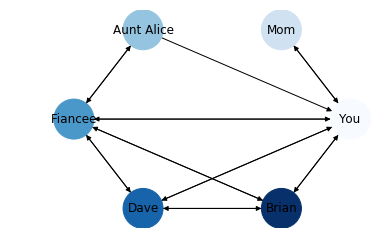

In [2]:
import networkx as nx

#Creating a directed graph
G = nx.DiGraph()
#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')
G.add_node('Dave')
G.add_node('Brian')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee'),('You','Dave'),('You','Brian')])
G.add_edges_from([('Mom','You')])
G.add_edges_from([('Aunt Alice','Fiancee'),('Aunt Alice','You')])
G.add_edges_from([('Fiancee','Aunt Alice'),('Fiancee','You'),('Fiancee','Dave'),('Fiancee','Brian')])
G.add_edges_from([('Dave','Fiancee'),('Dave','You'),('Dave','Brian')])
G.add_edges_from([('Brian','Fiancee'),('Brian','You'),('Brian','Dave')])

#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

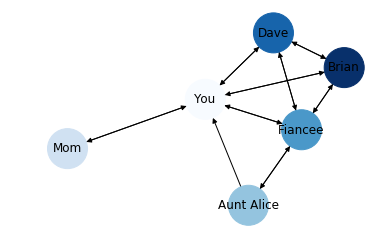

In [3]:
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

In [4]:
print("This graph has {} nodes and {} edges.".format(G.number_of_nodes(),G.number_of_edges()))

print('The "Aunt Alice" node has an in-degree of {} and an out-degree of {}.'.format(G.in_degree('Aunt Alice'),G.out_degree('Aunt Alice')))

print("The nodes are {}.".format(G.nodes()))

print("The edges are {}.".format(G.edges()))

print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(G)))

print('The node degrees are {}.'.format(G.degree()))

This graph has 6 nodes and 17 edges.
The "Aunt Alice" node has an in-degree of 1 and an out-degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee', 'Dave', 'Brian'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('You', 'Dave'), ('You', 'Brian'), ('Mom', 'You'), ('Aunt Alice', 'Fiancee'), ('Aunt Alice', 'You'), ('Fiancee', 'Aunt Alice'), ('Fiancee', 'You'), ('Fiancee', 'Dave'), ('Fiancee', 'Brian'), ('Dave', 'Fiancee'), ('Dave', 'You'), ('Dave', 'Brian'), ('Brian', 'Fiancee'), ('Brian', 'You'), ('Brian', 'Dave')].
The betweenness centrality scores are {'You': 0.45, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.25, 'Dave': 0.0, 'Brian': 0.0}
The node degrees are [('You', 9), ('Mom', 2), ('Aunt Alice', 3), ('Fiancee', 8), ('Dave', 6), ('Brian', 6)].


In [5]:
print("Simple paths:",nx.all_pairs_node_connectivity(G),'\n')
print("Shortest paths:", nx.all_pairs_shortest_path(G))

Simple paths: {'You': {'Mom': 1, 'Aunt Alice': 1, 'Fiancee': 3, 'Dave': 3, 'Brian': 3}, 'Mom': {'You': 1, 'Aunt Alice': 1, 'Fiancee': 1, 'Dave': 1, 'Brian': 1}, 'Aunt Alice': {'You': 2, 'Mom': 1, 'Fiancee': 2, 'Dave': 2, 'Brian': 2}, 'Fiancee': {'You': 4, 'Mom': 1, 'Aunt Alice': 1, 'Dave': 3, 'Brian': 3}, 'Dave': {'You': 3, 'Mom': 1, 'Aunt Alice': 1, 'Fiancee': 3, 'Brian': 3}, 'Brian': {'You': 3, 'Mom': 1, 'Aunt Alice': 1, 'Fiancee': 3, 'Dave': 3}} 

Shortest paths: <generator object all_pairs_shortest_path at 0x0000022D140DE938>


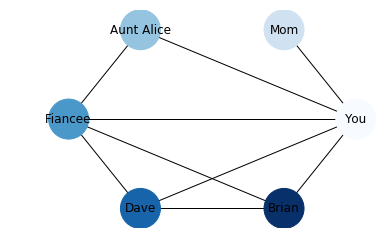

This graph has 6 nodes and 9 edges.
The "Aunt Alice" node has a degree of 2.
The nodes are ['You', 'Mom', 'Aunt Alice', 'Fiancee', 'Dave', 'Brian'].
The edges are [('You', 'Mom'), ('You', 'Fiancee'), ('You', 'Dave'), ('You', 'Brian'), ('You', 'Aunt Alice'), ('Aunt Alice', 'Fiancee'), ('Fiancee', 'Dave'), ('Fiancee', 'Brian'), ('Dave', 'Brian')].
The clustering coefficients are: {'You': 0.4, 'Mom': 0, 'Aunt Alice': 1.0, 'Fiancee': 0.6666666666666666, 'Dave': 1.0, 'Brian': 1.0}
The betweenness centrality scores are {'You': 0.5, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.1, 'Dave': 0.0, 'Brian': 0.0}
The degree centrality scores are [('You', 5), ('Mom', 1), ('Aunt Alice', 2), ('Fiancee', 4), ('Dave', 3), ('Brian', 3)]


In [6]:
UG=G.to_undirected()

#Drawing the new graph
nx.draw_networkx(UG,
                 pos=nx.circular_layout(UG), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

print("This graph has {} nodes and {} edges.".format(UG.number_of_nodes(),UG.number_of_edges()))

print('The "Aunt Alice" node has a degree of {}.'.format(UG.degree('Aunt Alice')))

print("The nodes are {}.".format(UG.nodes()))

print("The edges are {}.".format(UG.edges()))

#Note that networkx does not have defined clustering algorithms for directed graphs.
print("The clustering coefficients are: {}".format(nx.clustering(UG)))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(UG)))
print("The degree centrality scores are {}".format(nx.degree(UG)))

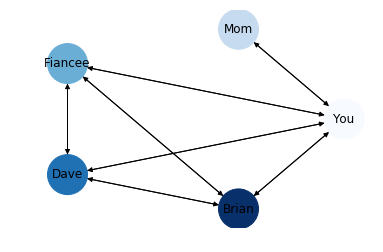

[('You', 'Mom'), ('You', 'Fiancee'), ('You', 'Dave'), ('You', 'Brian'), ('Mom', 'You'), ('Fiancee', 'You'), ('Fiancee', 'Dave'), ('Fiancee', 'Brian'), ('Dave', 'Fiancee'), ('Dave', 'You'), ('Dave', 'Brian'), ('Brian', 'Fiancee'), ('Brian', 'You'), ('Brian', 'Dave')]


In [7]:
small_G=G.copy()
small_G.remove_node('Aunt Alice')
nx.draw_networkx(small_G,pos=nx.circular_layout(small_G),node_size=1600, cmap=plt.cm.Blues,
        node_color=range(len(small_G)))
plt.axis('off')
plt.show()

print(small_G.edges())

The clustering coefficients are: {'You': 0.06738793548317168, 'Mom': 0, 'Aunt Alice': 0.1912931182772389, 'Fiancee': 0.11231322580528613, 'Dave': 0.13043103942574633, 'Brian': 0.13043103942574633}
The betweenness centrality scores are {'You': 0.7000000000000001, 'Mom': 0.0, 'Aunt Alice': 0.0, 'Fiancee': 0.0, 'Dave': 0.15000000000000002, 'Brian': 0.15000000000000002}
The degree centrality scores are [('You', 10.1), ('Mom', 1), ('Aunt Alice', 10.1), ('Fiancee', 19), ('Dave', 3), ('Brian', 3)]


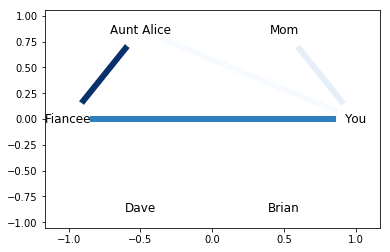

In [9]:
weighted_UG=UG.copy()

#Adding weights reflecting that Aunt Alice and Mom talk more than once a day
weighted_UG['Aunt Alice']['Fiancee']['weight'] = 10
#Adding a weight reflecting that You and Mom text once a week
weighted_UG['You']['Mom']['weight'] = 1
#Adding a weight reflecting that Aunt Alice almost never talks to You
weighted_UG['Aunt Alice']['You']['weight'] = .1
#Adding a weight reflecting that You talk to your fiancee every day
weighted_UG['You']['Fiancee']['weight'] = 7

#Extracting edges and weights into two lists
edges,weights=zip(*nx.get_edge_attributes(weighted_UG,'weight').items())
nx.draw_networkx(weighted_UG,
                 pos=nx.circular_layout(weighted_UG),
                 node_size=1600,
                 node_color="white", 
                 edgelist=edges, #Ordering the edges so that the weights list works
                 edge_color=weights, #Weights
                 width=6.0, 
                 edge_cmap=plt.cm.Blues) #Darker colors indicate higher weights

#Note that to incorporate weights into most calculations in networkx, you need to specify the name of the weight attribute.
print("The clustering coefficients are: {}".format(nx.clustering(weighted_UG, weight='weight')))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(weighted_UG, weight='weight')))
print("The degree centrality scores are {}".format(nx.degree(weighted_UG, weight='weight')))